The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

----In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.----

Road MAP

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation

-----------------------
Make some Hypothesis 
Look at the dataset and see what type of variables are present are the varibles in numaric or categorical
Identify the target variable 

Find whether there are any missing values
coversion of varibles 
    
Visualization

Apply the classification models 
logistic regression 
Decision tree
Naive bayes        ----------------------


### import packages 

import numpy as np
import pandas as pd # data analytics 
import matplotlib.pyplot as plt

In [138]:
### load the dataset

titanic_train = pd.read_csv('train_titanic.csv')

titanic_test = pd.read_csv('test_titanic.csv')

In [139]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
titanic_train.shape

(891, 12)

In [15]:
titanic_test.shape

(418, 11)

In [16]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
# some hypothesis
# Who survived more male or female(linked to gender)
# Did more number of females and children servived
# Class played an important role 
# Parents try to save children 

### statistics on numatic data 

titanic_train.describe()

### some visialization on numaric data
%pylab inline
titanic_train['Fare'].plot(kind='hist')



In [40]:

# Fare is left screwed 
titanic_train['Fare'].mean()
#titanic_train['Fare'].median()

32.2042079685746

In [42]:
titanic_train['Fare'].median()

14.4542

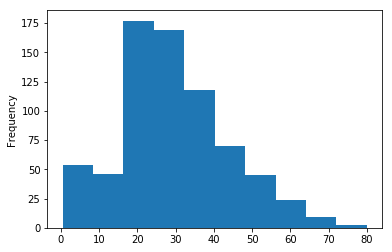

In [44]:
titanic_train['Age'].plot(kind='hist')


In [45]:
# looks to be almost normally distributed
# Age is little skewed not much mean and median are almost equal so we can will the missing values using Either one of these 
titanic_train['Age'].mean()


29.69911764705882

In [46]:
titanic_train['Age'].median()

28.0

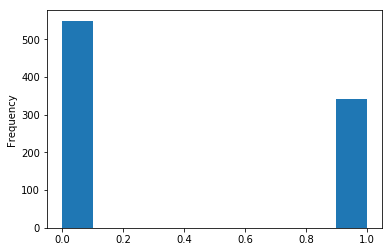

In [47]:
titanic_train['Survived'].plot(kind='hist')

# more died 

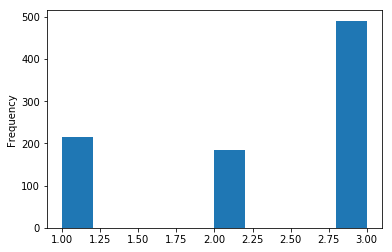

In [48]:
titanic_train['Pclass'].plot(kind='hist')

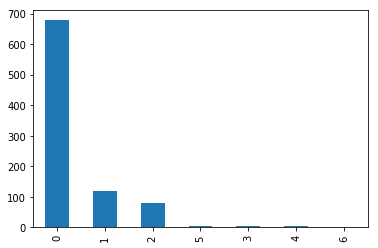

In [51]:
titanic_train['Parch'].value_counts().plot(kind='bar')

In [52]:
titanic_train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

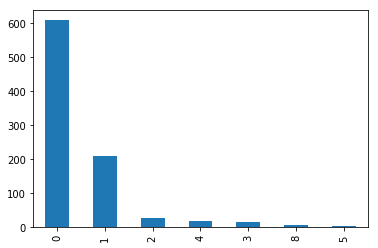

In [53]:
titanic_train['SibSp'].value_counts().plot(kind='bar')

In [ ]:
titanic_train[''].value_counts().plot(kind='bar')

### testing the hypothesis 


titanic_train.groupby(['Sex']).mean()

In [61]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [77]:
titanic_train[['Survived','Age','Fare']].groupby('Survived').mean()

,Age,Fare
Survived,,
0,30.626179,22.117887
1,28.343690,48.395408


In [80]:
titanic_train[['Survived','Age','Fare','Pclass']].groupby('Pclass').mean()

,Survived,Age,Fare
Pclass,,,
1,0.629630,38.233441,84.154687
2,0.472826,29.877630,20.662183
3,0.242363,25.140620,13.675550


In [81]:
titanic_train[['Survived','Age','Fare','Pclass','SibSp']].groupby('Pclass').mean()

,Survived,Age,Fare,SibSp
Pclass,,,,
1,0.629630,38.233441,84.154687,0.416667
2,0.472826,29.877630,20.662183,0.402174
3,0.242363,25.140620,13.675550,0.615071


In [85]:
titanic_train[['Survived','Age','Fare','SibSp']].groupby('SibSp').mean()

,Survived,Age,Fare,Parch
SibSp,,,,
0,0.345395,31.397558,25.692028,0.185855
1,0.535885,30.089727,44.147370,0.655502
2,0.464286,22.620000,51.753718,0.642857
3,0.250000,13.916667,68.908862,1.312500
4,0.166667,7.055556,31.855556,1.500000
5,0.000000,10.200000,46.900000,2.000000
8,0.000000,NaN,69.550000,2.000000


### handling missing data

In [91]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [123]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [150]:
# missing data in Cabin is more that 50 % so it is droped

titanic_train.drop(['Cabin'],inplace=True,axis=1)

titanic_test.drop(['Cabin'],inplace=True,axis=1)

In [154]:
# 177 missing data in age
#titanic_train['Age'].fillna(titanic_train['Age'].median(),inplace=True)
titanic_test['Age'].fillna(titanic_test['Age'].median(),inplace=True)

In [143]:
titanic_train['Embarked'].value_counts()

titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [144]:

titanic_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [145]:

titanic_train['Embarked'].fillna('S',inplace=True)


In [103]:
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### converting to categorical to numeric

In [152]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 76.6+ KB


In [171]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [178]:
#titanic_train['Sex'] = titanic_train['Sex'].map({'male':0,'female':1})
titanic_test['Sex']=titanic_test['Sex'].map({'male':0,'female':1})

In [109]:
titanic_train.Sex.value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [126]:
titanic_train.Embarked.value_counts()


0    646
1    245
Name: Embarked, dtype: int64

In [175]:
#titanic_train['Embarked']=titanic_train['Embarked'].map({'S':0,'C':1,'Q':1})

titanic_test['Embarked']=titanic_test['Embarked'].map({'S':0,'C':1,'Q':1})

### Modeling

In [148]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [156]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [157]:
pred_col = ['Pclass','Sex','SibSp','Parch', 'Fare', 'Embarked']
      

In [ ]:
# logistic regression

In [158]:
from sklearn import cross_validation as CV

C:\Users\amogh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [159]:
from sklearn.linear_model import LogisticRegression

In [160]:
Logistic = LogisticRegression()

In [163]:
scores = CV.cross_val_score(Logistic,titanic_train[pred_col],titanic_train['Survived'],cv=5)

In [164]:
print(scores.mean())

0.787901674843


In [ ]:

# Decision tree

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
DC = DecisionTreeClassifier()

In [167]:
scores = CV.cross_val_score(DC,titanic_train[pred_col],titanic_train['Survived'],cv=5)

In [168]:
scores.mean()

0.79020543041016933

In [169]:
DC.fit(titanic_train[pred_col],titanic_train['Survived'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [179]:
y_pred=DC.predict(titanic_test[pred_col])

In [184]:
sur = pd.DataFrame({
    'ID':titanic_test['PassengerId'],'sur':y_pred})

In [187]:
sur.head()

,ID,sur
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
